# TidalPy Surface Maps and Projection Plotting
Most models used in TidalPy calculate results in spherical coordinates on evenly spaced grids in latitude and longitude. This data can be displayed in a box format, but often other projections are more visually accurate since surface area is compressed at the poles. It is helpful to visualize these 3D results using other 2D projections. Luckily, TidalPy takes advantage of the great `cartopy` package to easily produce surface maps using many types of projections. This demo goes through the basics of using this plotting functionality. More information can be found in the documentation for `TidalPy.utilities.graphics.global_map.py`.

If you use this feature for any figures used in publications or presentations please consider citing `cartopy` for their hard work making this complicated geometry so easy!
[Cartopy Website](https://scitools.org.uk/cartopy/docs/latest/index.html)
DOI: [10.5281/zenodo.1182735](https://doi.org/10.5281/zenodo.5842769)


In [1]:
import numpy as np
from TidalPy.utilities.graphics.global_map import projection_map

# Make some data to plot
longitude_deg = np.linspace(0., 360., 100)
colatitude_deg = np.linspace(0., 180., 101)
longitude = np.radians(longitude_deg)
colatitude = np.radians(colatitude_deg)

longitude_matrix, colatitude_matrix = np.meshgrid(longitude, colatitude, indexing='ij')

### Regular Spherical Coordinated Data

Below is an example of what regular box data looks like when plotted.

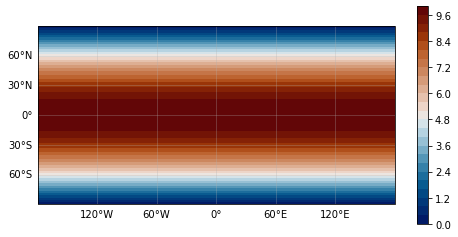

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [2]:
data = 10. * (np.sin(colatitude_matrix))
projection_map(longitude_deg, colatitude_deg, data, projection='PlateCarree', cmap='vik', auto_save=False)

This is actually not that bad of a visual representation. Compared to something like a Mercator projection which over-emphasizes polar regions like so...

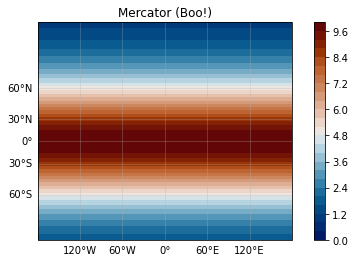

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Mercator (Boo!)'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [3]:
data = 10. * (np.sin(colatitude_matrix))
projection_map(longitude_deg, colatitude_deg, data, projection='Mercator', title='Mercator (Boo!)', cmap='vik', auto_save=False)

### Mollweide Projection
But we can do better than either of those methods. This example utilizes the Mollweide project which is the default for TidalPy.
Mollweide is pseudocylindrical, and equal area. Parallels are unequally-spaced straight lines, while meridians are elliptical arcs up to semicircles on the edges. Poles are points. It is commonly used for world maps, or interrupted with several central meridians.

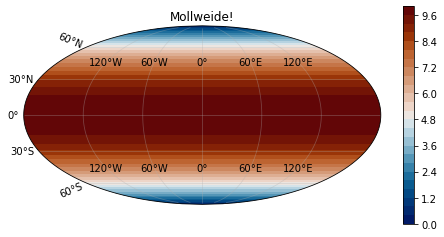

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Mollweide!'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [4]:
data = 10. * (np.sin(colatitude_matrix))
projection_map(longitude_deg, colatitude_deg, data, projection='Mollweide', title='Mollweide!', auto_save=False)

Don't like the color? Change it to your favorite colormap!
Let's add Earth's coastlines too for comparison purposes for this example and change up the data profile.

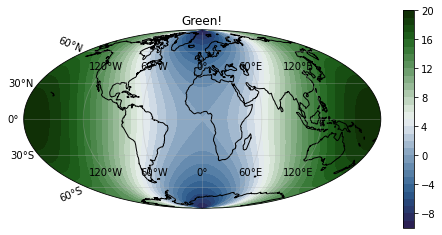

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Green!'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [5]:
data = 10. * (np.sin(colatitude_matrix) - np.cos(longitude_matrix))
projection_map(longitude_deg, colatitude_deg, data, projection='Mollweide', title='Green!', cmap='cork', show_earth_coast=True, auto_save=False)

### Robinson Projection
This projection is pseudocylindrical, and a compromise that is neither equal-area nor conformal. Parallels are unequally-spaced straight lines, and meridians are curved lines of no particular form. It is commonly used for “visually-appealing” world maps.

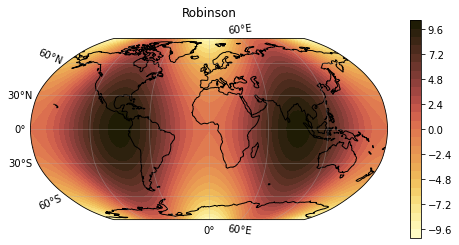

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Robinson'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [6]:
data = 10. * (np.sin(colatitude_matrix) - np.cos(longitude_matrix)**2)
projection_map(longitude_deg, colatitude_deg, data, projection='Robinson', title='Robinson', cmap='lajolla', show_earth_coast=True, auto_save=False)

### Orthographic Projection

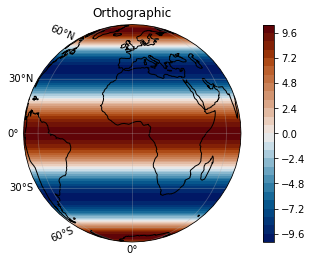

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Orthographic'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [7]:
data = 10. * (np.sin(5. * colatitude_matrix))
projection_map(longitude_deg, colatitude_deg, data, projection='Orthographic', title='Orthographic', cmap='vik', show_earth_coast=True, auto_save=False)

### RotatedPole Projection
This projection is particular useful for showing detail at the poles.

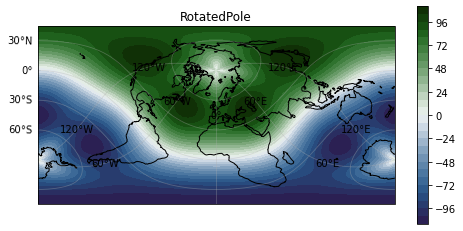

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'RotatedPole'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [8]:
data = 10. * (10 * np.sin(2. * colatitude_matrix) - np.cos(4. * longitude_matrix))
projection_map(longitude_deg, colatitude_deg, data, projection='RotatedPole', title='RotatedPole', cmap='cork', show_earth_coast=True, auto_save=False)

We can change the position by using the `rotated_pole_input` dictionary.

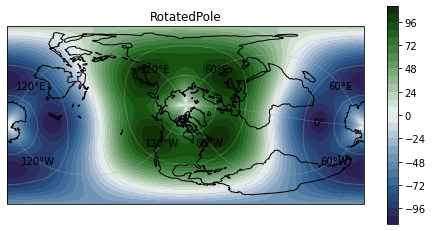

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'RotatedPole'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [9]:
rotated_pole_input = {'pole_latitude': 10, 'pole_longitude': 90}
data = 10. * (10 * np.sin(2. * colatitude_matrix) - np.cos(4. * longitude_matrix))
projection_map(longitude_deg, colatitude_deg, data, projection='RotatedPole', title='RotatedPole', cmap='cork', show_earth_coast=True, rotated_pole_input=rotated_pole_input, auto_save=False)

It is likely that you will want to use different colorbar scales and limits. This is easy to modify as shown below.

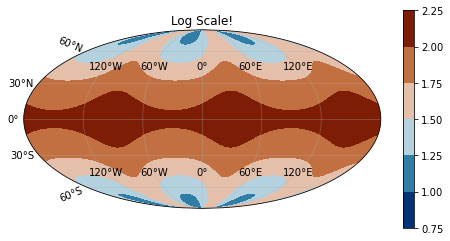

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Log Scale!'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [10]:
data = 10. * (10**np.sin(colatitude_matrix)**2 + 3**np.cos(3. * longitude_matrix - np.pi/2))
projection_map(longitude_deg, colatitude_deg, data, projection='Mollweide', title='Log Scale!',
               cpoints=[0.75, 1, 1.25, 1.5, 1.75, 2, 2.25], zlog=True, auto_save=False)

Rather than changing the number of z-levels, we can just change the tick numbers and labels.

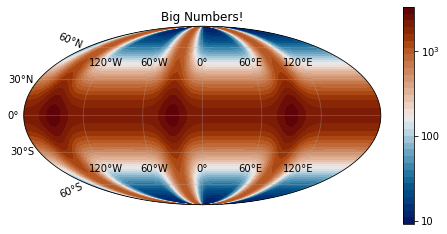

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Big Numbers!'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [11]:
data = 10. * (200**np.sin(colatitude_matrix)**2 + 100**np.cos(3. * longitude_matrix + np.pi/2))
projection_map(longitude_deg, colatitude_deg, data, projection='Mollweide', title='Big Numbers!',
               cpoints=30, zlog=True, zticks=[1, 2, 3], ztick_labels=['10', '100', '$10^{3}$'], auto_save=False)

### Incomplete Data
You do not need to fully fill out the lat/long domain in order to plot data. Partial data is accepted for all projections.

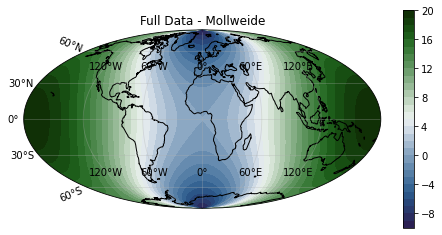

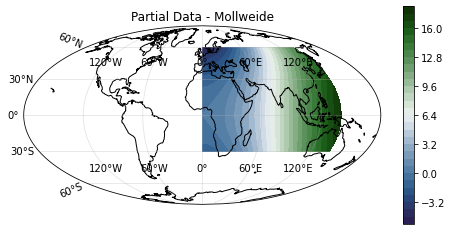

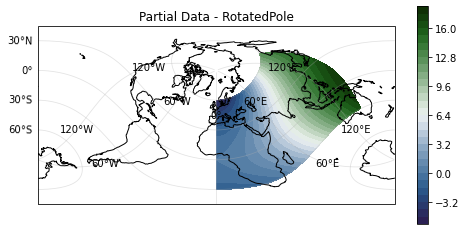

(<Figure size 576x288 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Partial Data - RotatedPole'}, xlabel='Longitude [deg.]', ylabel='Latitude [deg.]'>)

In [12]:
longitude_deg_reduced = np.linspace(0., 140., 100)
colatitude_deg_reduced = np.linspace(30., 120., 101)
longitude_reduced = np.radians(longitude_deg_reduced)
colatitude_reduced = np.radians(colatitude_deg_reduced)

longitude_matrix_reduced, colatitude_matrix_reduced = np.meshgrid(longitude_reduced, colatitude_reduced, indexing='ij')

data = 10. * (np.sin(colatitude_matrix) - np.cos(longitude_matrix))
data_reduced = 10. * (np.sin(colatitude_matrix_reduced) - np.cos(longitude_matrix_reduced))

projection_map(longitude_deg, colatitude_deg, data, projection='Mollweide', title='Full Data - Mollweide', cmap='cork', show_earth_coast=True, auto_save=False)

projection_map(longitude_deg_reduced, colatitude_deg_reduced, data_reduced, projection='Mollweide', title='Partial Data - Mollweide', cmap='cork', show_earth_coast=True, auto_save=False)

projection_map(longitude_deg_reduced, colatitude_deg_reduced, data_reduced, projection='RotatedPole', title='Partial Data - RotatedPole', cmap='cork', show_earth_coast=True, auto_save=False)